# Power Spectra

Want to compare power between DNS and CE2.

Power here is the "2D" power spectrum

$$P_{m,n}(\zeta) = |\hat{\zeta}(m, n)|^2 $$

where $\hat{\zeta}_{m,n}$ is the mode amplitude at $k_x = m, k_y = n \pi$.

In CE2, this can be calculated from the second cumulant as 

$$P_{m,n}(\zeta) = |\hat{c}_{\zeta \zeta}(m,n,n)| + |\hat{c}_\zeta(n)|^2 $$

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import h5py
import numpy as np
from dedalus.extras.plot_tools import plot_bot

In [2]:
plt.style.use("prl")

In [7]:
!ls -ltr CE2/run_A_explicit/data_snapshots/data_snapshots_*.h5

-rw-r--r-- 1 joishi Faculty 9390992 Jun  3 16:00 CE2/run_A_explicit/data_snapshots/data_snapshots_s1.h5
-rw-r--r-- 1 joishi Faculty 9390992 Jun  3 16:00 CE2/run_A_explicit/data_snapshots/data_snapshots_s2.h5
-rw-r--r-- 1 joishi Faculty 9390992 Jun  3 16:00 CE2/run_A_explicit/data_snapshots/data_snapshots_s3.h5
-rw-r--r-- 1 joishi Faculty 9390992 Jun  3 16:00 CE2/run_A_explicit/data_snapshots/data_snapshots_s4.h5
-rw-r--r-- 1 joishi Faculty 9390992 Jun  3 16:00 CE2/run_A_explicit/data_snapshots/data_snapshots_s5.h5
-rw-r--r-- 1 joishi Faculty 9390992 Jun  3 16:00 CE2/run_A_explicit/data_snapshots/data_snapshots_s6.h5
-rw-r--r-- 1 joishi Faculty 9390992 Jun  3 16:00 CE2/run_A_explicit/data_snapshots/data_snapshots_s7.h5
-rw-r--r-- 1 joishi Faculty 9390992 Jun  3 16:00 CE2/run_A_explicit/data_snapshots/data_snapshots_s8.h5
-rw-r--r-- 1 joishi Faculty 9390992 Jun  3 16:00 CE2/run_A_explicit/data_snapshots/data_snapshots_s9.h5
-rw-r--r-- 1 joishi Faculty 9390992 Jun  3 16:00 CE2/run_A_expli

In [81]:
#dns_file = "scratch/busse_annulus_ra4.00e+07_beta3.16e+05_C3.16e-01_Pr1.00e+00_filter5.00e-01_nx512_ny128_CFL/snapshots/snapshots_s2.h5"
dns_file = "scratch/busse_annulus_ra7.60e+04_beta2.80e+03_C0.00e+00_Pr1.00e+00_filter5.00e-01_nx256_ny64_CFL/snapshots/snapshots_s1.h5"

ce2_file = "CE2/run_A_explicit/data_snapshots/data_snapshots_s21.h5"
#ce2_file = "CE2/run_A_t2.0_20200219/data_snapshots/data_snapshots_s39.h5"

In [82]:
dns_df = h5py.File(dns_file,"r")
ce2_df = h5py.File(ce2_file,"r")

In [103]:
def calc_power(x, y, data):
    power = (data*data.conj()).real
    
    return x, y, np.log10(power)

def calc_ce2_power(x, y, data):
    zero_data = data[:,0]
    data[:,0] = (zero_data*zero_data.conj()).real
    
    return x, y, np.log10(np.abs(data))

In [102]:
plot_bot??

/home/joishi/miniconda3/envs/dedalus/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


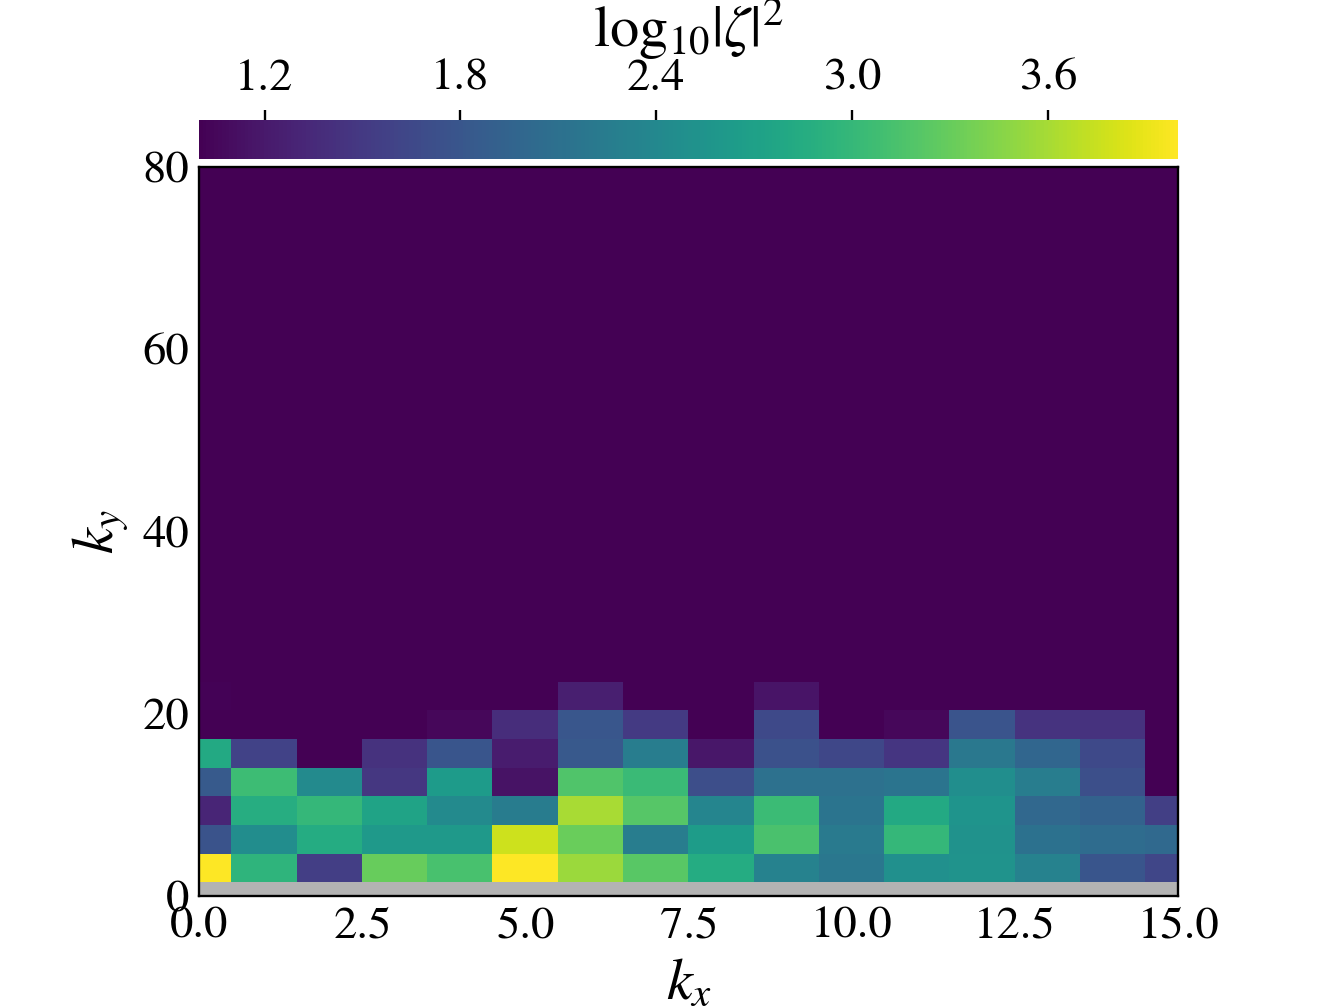

Text(0, 0.5, '$k_{y}$')

In [84]:
image_axes = (2,1)
image_slices = (-1,slice(None), slice(None))
pax, cax = plot_bot(dns_df['tasks/zeta_kspace'],image_axes, image_slices,func=calc_power,clim=(1,4), cmap='viridis')
pax.set_xlim(0,15)
pax.set_ylim(0,80)
cax.set_xlabel(r"$\log_{10} |\hat{\zeta}|^2$")
pax.set_xlabel(r"$k_x$")
pax.set_ylabel(r"$k_{y}$")

In [17]:
ce2_df['tasks/zeta_power'].shape

(1, 16, 32, 32)

/home/joishi/miniconda3/envs/dedalus/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


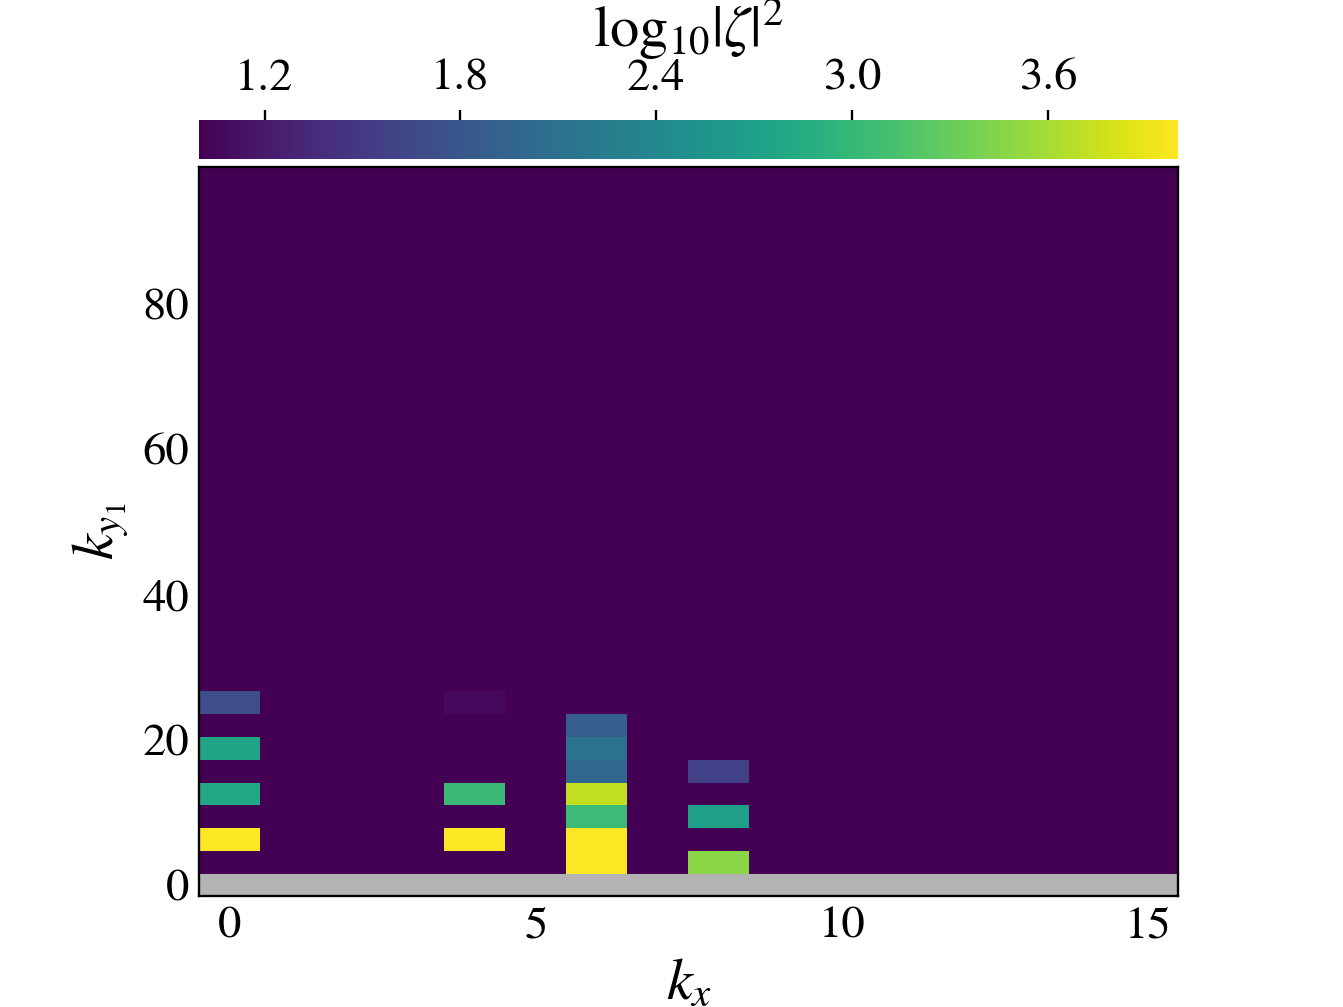

Text(0, 0.5, '$k_{y_1}$')

In [104]:
image_axes = (1,3)
image_slices = (-1,slice(None), 0,slice(None))
pax, cax = plot_bot(ce2_df['tasks/zeta_power'],image_axes, image_slices,func=calc_ce2_power, clim=(1,4),cmap='viridis')
cax.set_xlabel(r"$\log_{10} |\hat{\zeta}|^2$")
pax.set_xlabel(r"$k_x$")
pax.set_ylabel(r"$k_{y_1}$")

In [33]:
def real_map(x,y,z):
    return x, y, z.real

In [41]:
ce2_df['tasks/zeta_power'][-1,1:,0,:].real.min()

-9.689368647222823e-09

In [ ]:
## image_axes = (2,1)
image_slices = (-1,slice(None), slice(None))
pax, cax = plot_bot(dns_df['tasks/zeta_kspace'],image_axes, image_slices,func=calc_power,clim=(-8,5), cmap='viridis')
cax.set_xlabel(r"$|\hat{\zeta}|^2$")
pax.set_xlabel(r"$k_x$")
pax.set_ylabel(r"$k_{y}$")

In [75]:
ce2_df['tasks/cz_power'].shape

(1, 1, 32, 32)

/home/joishi/miniconda3/envs/dedalus/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/joishi/miniconda3/envs/dedalus/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


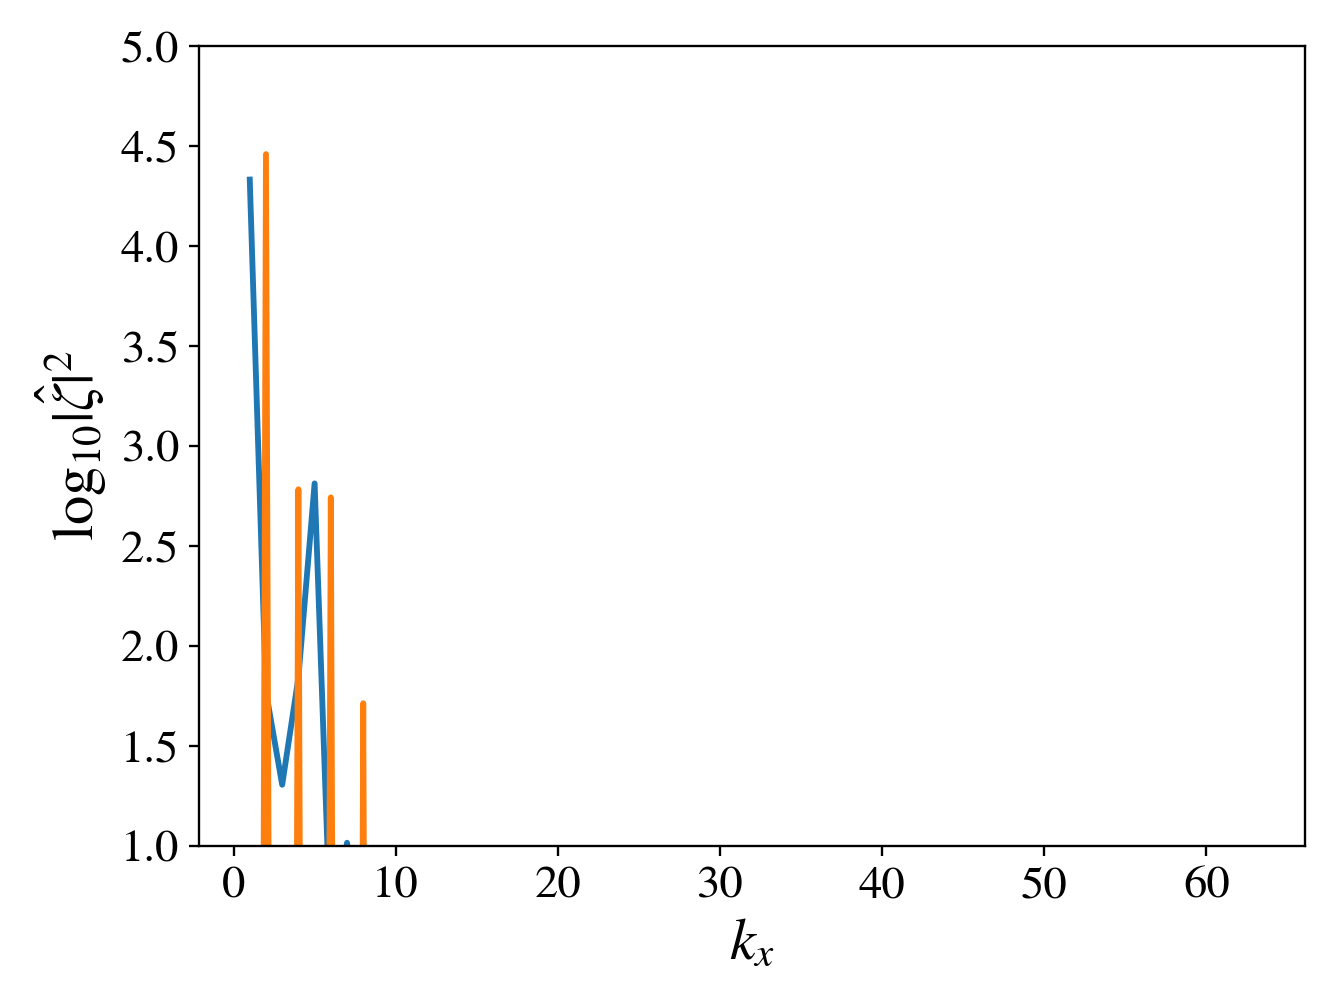

In [108]:
x,y,zeta_spec = calc_power(0,0,dns_df['tasks/zeta_kspace'][-1,:,:])
x,y,zeta_ce2_spec = calc_ce2_power(0,0,ce2_df['tasks/zeta_power'][-1,:,0,:].T)
x,y,zeta_ce2_cz_spec = calc_power(0,0,ce2_df['tasks/cz_power'][-1,:,:,:])
plt.figure()
plt.plot(zeta_spec[:,0])
plt.plot(zeta_ce2_spec[:,0])
plt.ylim(1,5)
plt.ylabel(r"$\log_{10} |\hat{\zeta}|^2$")
plt.xlabel(r"$k_x$")
plt.tight_layout()